<a href="https://colab.research.google.com/github/kishore9096/Projects/blob/main/Medical_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Read the data file
df = pd.read_csv("/content/drive/MyDrive/Data Analysis/insurance.csv")

In [4]:
# Basic info about the data

In [5]:
df.shape

(1338, 7)

In [6]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

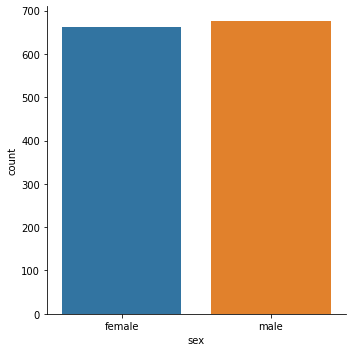

In [9]:
sns.catplot(x = "sex",kind="count",data=df)

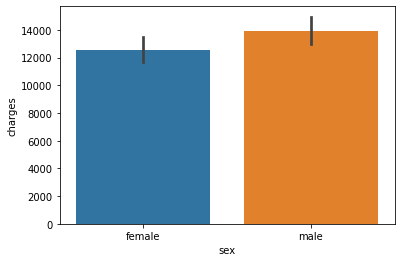

In [10]:
sns.barplot(x = "sex",y = "charges",data=df)  # Male's got more charges

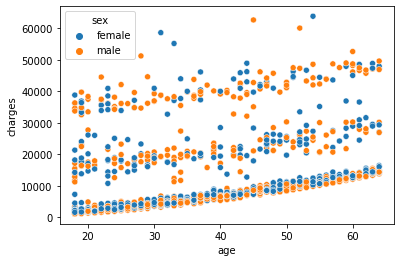

In [13]:
sns.scatterplot(x = "age",y = "charges",hue = "sex",data=df)   # The point are clumpsy

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


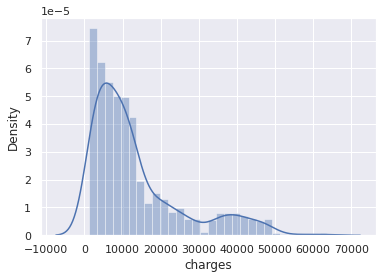

In [14]:
sns.set()
sns.distplot(df["charges"])   # Most of the charges lies near 10000.

In [15]:
# Encode the categorical variables

In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [18]:
from sklearn.preprocessing import OrdinalEncoder


In [25]:
from scipy.sparse import data
ord = OrdinalEncoder()
df[["sex","smoker","region"]] = ord.fit_transform(df[["sex","smoker","region"]])
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

In [26]:
df.region.value_counts()

2.0    364
3.0    325
1.0    325
0.0    324
Name: region, dtype: int64

# Model building

Now all the columns are numerical so lets do th model building

In [27]:
X = df.drop("charges",axis=1)
y = df["charges"]

In [30]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)   # Stratify will allocate the y values equally
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [33]:
# Linear regression

from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics

linear_r = LinearRegression()
linear_r.fit(X_train,y_train)

LinearRegression()

In [34]:
# Predicting the Train
lr_p = linear_r.predict(X_train)
metrics.r2_score(lr_p,y_train)    # We got a good r_square(lesser is better)

0.6852018784480435

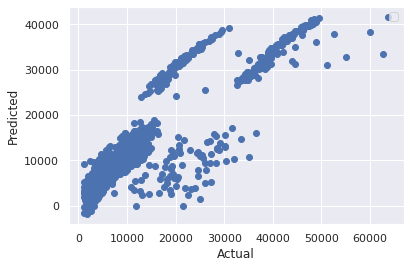

In [36]:
# Plot the differences

plt.scatter(x = y_train, y = lr_p)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

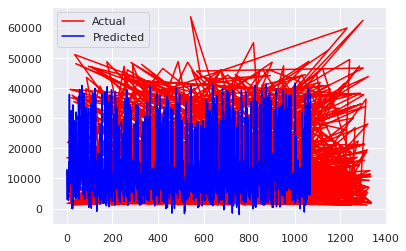

In [39]:
plt.plot(y_train, color="red", label = "Actual")
plt.plot(lr_p, color="blue", label = "Predicted")
plt.legend()                                       # This graph shows that the actual and predicted are similar

In [41]:
# Predicting the Test
lr_p_test = linear_r.predict(X_test)
metrics.r2_score(lr_p_test,y_test)    # We got a good r_square(lesser is better)

0.6752474810815678

Both R squares are similar, it means the model is not overfitted or underfitted

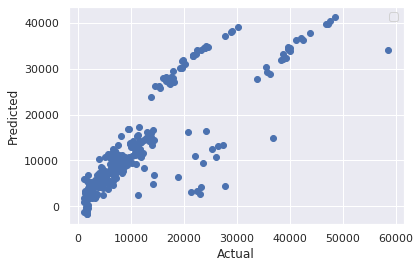

In [42]:
# Plot the differences

plt.scatter(x = y_test, y = lr_p_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

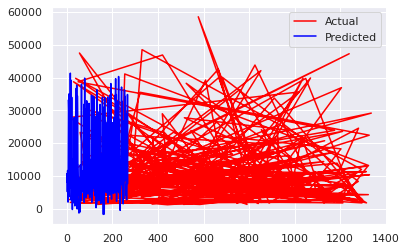

In [43]:
plt.plot(y_test, color="red", label = "Actual")
plt.plot(lr_p_test, color="blue", label = "Predicted")
plt.legend() 

In [44]:
# Lets build a predictive system

In [53]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.90,0,1.0,3.0,16884.9240
1,18,1.0,33.77,1,0.0,2.0,1725.5523
2,28,1.0,33.00,3,0.0,2.0,4449.4620


In [55]:
inp_d = ((19,0.0,27.9,0,1.0,3.0),(18,1.0,33.77,1,0.0,2.0),(28,1.0,33.00,3,0.0,2.0))
inp_array = np.asarray(inp_d)
#inp_reshape = inp_array.reshape(1,-1)  # For predicting only 1 value
linear_r.predict(inp_array)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25841.7971056 ,  3361.57846764,  6548.68206833])

In [56]:
# We were expecting a values of 16884, but we got 25841 which is bad. The values are near but not exact. Error of 50%.

In [57]:
# Lets try with Lasso

In [63]:
lasso = Lasso()
lasso.fit(X_train,y_train)


Lasso()

In [64]:
# Predicting the Test
lasso_p = lasso.predict(X_test)
metrics.r2_score(lasso_p,y_test)    # We got a good r_square(lesser is better)

0.6751580520460705

In [65]:
# Predictive system

inp_d = ((19,0.0,27.9,0,1.0,3.0),(18,1.0,33.77,1,0.0,2.0),(28,1.0,33.00,3,0.0,2.0))
inp_array = np.asarray(inp_d)
#inp_reshape = inp_array.reshape(1,-1)  # For predicting only 1 value
lasso.predict(inp_array)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([25836.58931744,  3365.84944444,  6551.48759199])

# Not much difference between the Linear and Lasso with this dataset.